In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
reviews = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header=None)

In [9]:
reviews.columns = ['Review', 'Pos or Neg']

In [10]:
reviews.head()

,Review,Pos or Neg
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [11]:
keywords = ['good', 'excellent', 'awesome', 'great','fantastic']

for key in keywords:
    reviews[str(key)] = reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

Chose good, excellent, awesome, great and fantastic as a starting point for positive reviews

In [12]:
reviews.head()

,Review,Pos or Neg,good,excellent,awesome,great,fantastic
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False


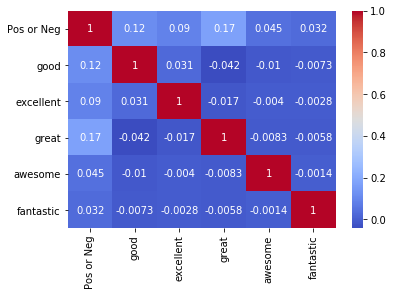

In [50]:
sns.heatmap(reviews.corr(), cmap='coolwarm', annot=True)

The features are pretty much uncorrelated, so the assumptions of the model are valid

In [25]:
data = reviews.drop(['Pos or Neg','Review'],axis=1)

In [14]:
target= reviews['Pos or Neg']

Creating a Naive Bayes model, importing the Bernoulli class since our target data is binary

In [15]:
from sklearn.naive_bayes import BernoulliNB

In [16]:
bnb = BernoulliNB()

In [17]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [18]:
y_pred = bnb.predict(data)

In [19]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 433


56.7% accuracy with those keywords, not very good but will try with another dataset

In [3]:
yelp_reviews = pd.read_csv('yelp_labelled.txt',delimiter= '\t', header=None)

In [4]:
yelp_reviews.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
yelp_reviews.columns = ['Review', 'Pos or Neg']

In [20]:
for key in keywords:
    yelp_reviews[str(key)] = yelp_reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

In [21]:
yelp_reviews.head()

,Review,Pos or Neg,good,excellent,awesome,great,fantastic
0,Wow... Loved this place.,1,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,True,False


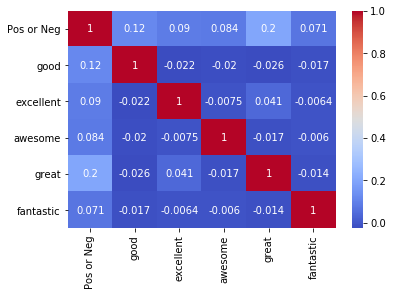

In [22]:
sns.heatmap(yelp_reviews.corr(), annot=True, cmap='coolwarm')

Correlations are low on this set as well, so the model is good to go

In [24]:
yelp_data = yelp_reviews.drop(['Pos or Neg','Review'],axis=1)

In [26]:
yelp_target= yelp_reviews['Pos or Neg']

In [27]:
bnb.fit(yelp_data, yelp_target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
yelp_y_pred = bnb.predict(yelp_data)

In [29]:
print("Number of mislabeled points out of a total {} points : {}".format(yelp_data.shape[0], (yelp_target != yelp_y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 416


Slightly better accuracy of 58.4%, but it could be improved with a longer and more appropiate list of keywords